In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
    

604

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163f186b130ef1b2ab58ec34b959f3d3


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | broome
Processing Record 2 of Set 1 | bratsk
Processing Record 3 of Set 1 | nosy varika
Processing Record 4 of Set 1 | yar-sale
Processing Record 5 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 1 | belomorsk
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | mao
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | hirado
Processing Record 12 of Set 1 | concepcion
Processing Record 13 of Set 1 | miraflores
Processing Record 14 of Set 1 | urdoma
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | almaznyy
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | lerwick
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 

Processing Record 36 of Set 4 | udankudi
Processing Record 37 of Set 4 | faanui
Processing Record 38 of Set 4 | meulaboh
Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | fort saint james
Processing Record 41 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 42 of Set 4 | cape town
Processing Record 43 of Set 4 | hay river
Processing Record 44 of Set 4 | tshikapa
Processing Record 45 of Set 4 | bahia honda
Processing Record 46 of Set 4 | provideniya
Processing Record 47 of Set 4 | sam chuk
Processing Record 48 of Set 4 | beyla
Processing Record 49 of Set 4 | lavrentiya
Processing Record 50 of Set 4 | koungheul
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | klaksvik
Processing Record 6 of Set 5 | nouakchott
Processing Record 7 of Set 5 | hofn
Processing Record 8 of Set 5 | ostrovnoy

Processing Record 24 of Set 8 | camacha
Processing Record 25 of Set 8 | pochutla
Processing Record 26 of Set 8 | teguise
Processing Record 27 of Set 8 | vacszentlaszlo
Processing Record 28 of Set 8 | oxelosund
Processing Record 29 of Set 8 | atlantis
Processing Record 30 of Set 8 | visby
Processing Record 31 of Set 8 | tura
Processing Record 32 of Set 8 | kjollefjord
Processing Record 33 of Set 8 | kemijarvi
Processing Record 34 of Set 8 | marfino
Processing Record 35 of Set 8 | ahumada
City not found. Skipping...
Processing Record 36 of Set 8 | marsa matruh
Processing Record 37 of Set 8 | porto novo
Processing Record 38 of Set 8 | najran
Processing Record 39 of Set 8 | patzite
Processing Record 40 of Set 8 | tolaga bay
Processing Record 41 of Set 8 | sierning
Processing Record 42 of Set 8 | wenling
Processing Record 43 of Set 8 | caravelas
Processing Record 44 of Set 8 | baykit
Processing Record 45 of Set 8 | shenjiamen
Processing Record 46 of Set 8 | jardim
Processing Record 47 of Se

Processing Record 12 of Set 12 | lagos
Processing Record 13 of Set 12 | botou
Processing Record 14 of Set 12 | cordoba
Processing Record 15 of Set 12 | gayeri
Processing Record 16 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 17 of Set 12 | santa maria
Processing Record 18 of Set 12 | dauphin
Processing Record 19 of Set 12 | port augusta
Processing Record 20 of Set 12 | wenatchee
Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | jutai
Processing Record 23 of Set 12 | xiaoweizhai
Processing Record 24 of Set 12 | lake havasu city
Processing Record 25 of Set 12 | zhetysay
Processing Record 26 of Set 12 | abha
Processing Record 27 of Set 12 | egvekinot
Processing Record 28 of Set 12 | ye
City not found. Skipping...
Processing Record 29 of Set 12 | magadan
Processing Record 30 of Set 12 | hualmay
Processing Record 31 of Set 12 | emirdag
Processing Record 32 of Set 12 | tailai
Processing Record 33 of Set 12 | karla
Processing Record 34 of Set 12 | or

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Broome,42.2506,-75.8330,25.02,75,100,5.99,US,2022-01-25 22:24:21
1,Bratsk,56.1325,101.6142,-3.51,99,99,2.93,RU,2022-01-25 22:24:21
2,Nosy Varika,-20.5833,48.5333,73.89,82,100,7.09,MG,2022-01-25 22:24:21
3,Yar-Sale,66.8333,70.8333,9.68,94,100,19.89,RU,2022-01-25 22:24:22
4,Belomorsk,64.5232,34.7668,13.68,88,6,7.90,RU,2022-01-25 22:24:22
5,Thompson,55.7435,-97.8558,-11.04,70,75,8.05,CA,2022-01-25 22:24:22
6,Mao,39.8885,4.2658,43.36,93,0,4.61,ES,2022-01-25 22:24:23
7,Kodiak,57.7900,-152.4072,31.51,55,0,4.61,US,2022-01-25 22:24:23
8,Hirado,33.3597,129.5531,47.39,68,86,16.13,JP,2022-01-25 22:24:23
9,Concepcion,-36.8270,-73.0498,69.60,64,0,13.80,CL,2022-01-25 22:24:23


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Broome,US,2022-01-25 22:24:21,42.2506,-75.8330,25.02,75,100,5.99
1,Bratsk,RU,2022-01-25 22:24:21,56.1325,101.6142,-3.51,99,99,2.93
2,Nosy Varika,MG,2022-01-25 22:24:21,-20.5833,48.5333,73.89,82,100,7.09
3,Yar-Sale,RU,2022-01-25 22:24:22,66.8333,70.8333,9.68,94,100,19.89
4,Belomorsk,RU,2022-01-25 22:24:22,64.5232,34.7668,13.68,88,6,7.90
5,Thompson,CA,2022-01-25 22:24:22,55.7435,-97.8558,-11.04,70,75,8.05
6,Mao,ES,2022-01-25 22:24:23,39.8885,4.2658,43.36,93,0,4.61
7,Kodiak,US,2022-01-25 22:24:23,57.7900,-152.4072,31.51,55,0,4.61
8,Hirado,JP,2022-01-25 22:24:23,33.3597,129.5531,47.39,68,86,16.13
9,Concepcion,CL,2022-01-25 22:24:23,-36.8270,-73.0498,69.60,64,0,13.80


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities2.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lat = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

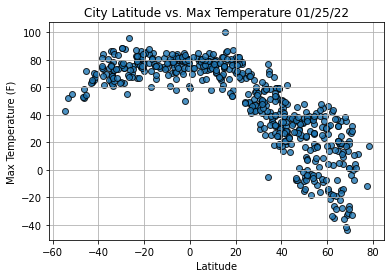

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.(6.3.1)
plt.scatter(lat,
            max_temps,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
#plt.ylim(40,110)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

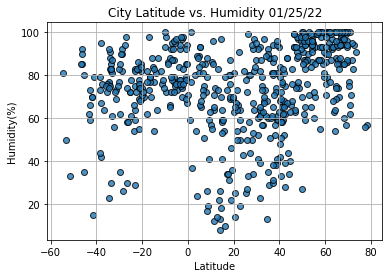

In [23]:
# Build the scatter plot for latitude vs. Humidity.(6.3.2)
plt.scatter(lat,
            humidity,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
#plt.ylim(40,110)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

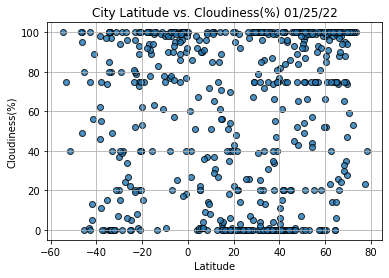

In [24]:
# Build the scatter plots for latitude vs. cloudiness.(6.3.3)
plt.scatter(lat, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
#Save the figure
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

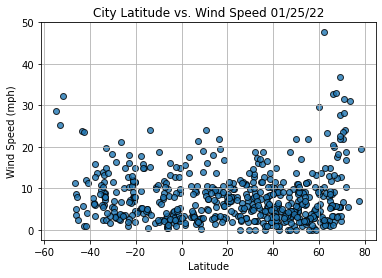

In [25]:
# Build the scatter plots for latitude vs. wind speed.(6.3.4)
plt.scatter(lat, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
#Save the figure
plt.savefig("weather_data/Fig4.png")
#Show plot
plt.show

In [ ]:
#weather_data_to_load = os.path.join("weather_data/cities.csv")

In [ ]:
#weather_data_df = pd.read_csv(weather_data_to_load)